In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def draw(G, attr):
    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    
    sns.distplot(list(nx.get_node_attributes(G, attr).values()), ax=axes[0], norm_hist=True).set_title('Bias-distribution')
    axes[0].set_xlim((-4,4))
    
    nodes = G.nodes
    color = [nx.get_node_attributes(G, attr)[nod] for nod in nodes]
    nx.draw_networkx(G, node_color = color, cmap=plt.cm.Blues, ax=axes[1])
    axes[1].set_title('karate-club-graph')
    
    #plt.show()

In [3]:
G = nx.karate_club_graph() # nx.dense_gnm_random_graph(100, 100) # 

for n in G.nodes:
    G.nodes[n]['bias'] = np.random.normal() # Normally distributed bias

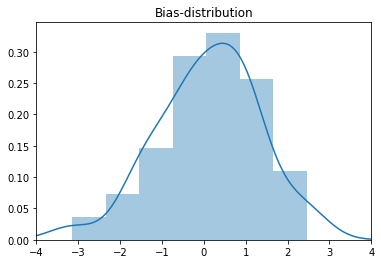

In [4]:
sns.distplot(list(nx.get_node_attributes(G, 'bias').values())).set_title('Bias-distribution')
plt.xlim((-4,4))
plt.show()

In [5]:
# can be replaced by probability distribution
br_threshold = 0.5  
mk_threshold = 0.5

In [6]:
for rep in range(20):
    #draw(G, 'bias')

    # re-arrangement of network according to individual bias
    for n in G.nodes:
        NB = list(nx.neighbors(G, n))
        NN = list(nx.non_neighbors(G, n))

        for nb in NB:
            if abs(G.nodes[n]['bias'] - G.nodes[nb]['bias']) >= br_threshold:
                if np.random.rand() < 0.1: # Probability of change in favorable condition
                    G.remove_edge(n, nb)

        for nn in NN: # can use ego with radius 2 instead of all non neighbours
            if abs(G.nodes[n]['bias'] - G.nodes[nn]['bias']) <= mk_threshold:
                if np.random.rand() < 0.1: # Probability of change in favorable condition
                    G.add_edge(n, nn)


    # effect of network on individual bias
    for n in G.nodes:
        ego = nx.ego_graph(G, n)
        ego_bias = np.mean(list(nx.get_node_attributes(G, 'bias').values()))

        # can be replaced by some function of ego bias and node bais
        G.nodes[n]['bias'] = (G.nodes[n]['bias'] + ego_bias)/2

GCC: 0.9752478987347795


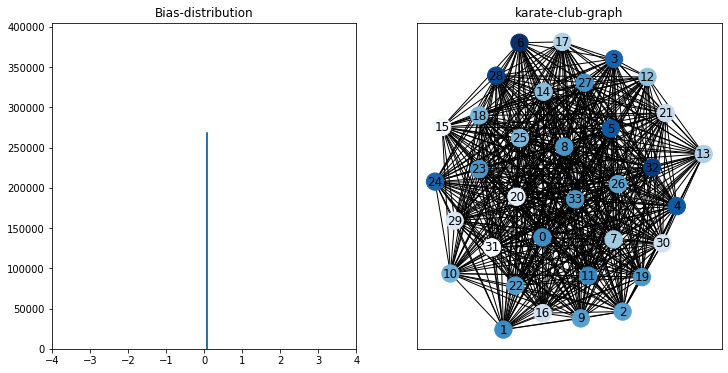

In [8]:
draw(G, 'bias')
print('GCC:', nx.average_clustering(G))